In [1]:
## Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading Dataset

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

## Data Visualization and Preprocessing

In [3]:
train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [4]:
test.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


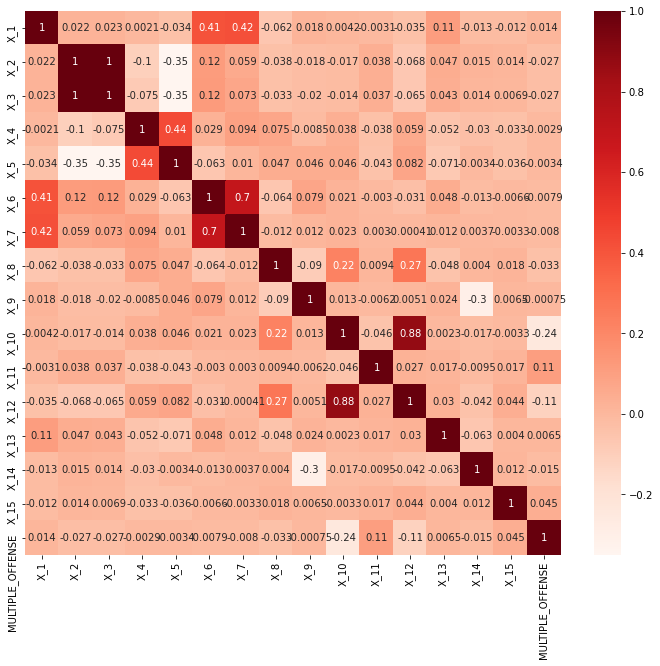

In [5]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INCIDENT_ID       23856 non-null  object 
 1   DATE              23856 non-null  object 
 2   X_1               23856 non-null  int64  
 3   X_2               23856 non-null  int64  
 4   X_3               23856 non-null  int64  
 5   X_4               23856 non-null  int64  
 6   X_5               23856 non-null  int64  
 7   X_6               23856 non-null  int64  
 8   X_7               23856 non-null  int64  
 9   X_8               23856 non-null  int64  
 10  X_9               23856 non-null  int64  
 11  X_10              23856 non-null  int64  
 12  X_11              23856 non-null  int64  
 13  X_12              23674 non-null  float64
 14  X_13              23856 non-null  int64  
 15  X_14              23856 non-null  int64  
 16  X_15              23856 non-null  int64 

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15903 entries, 0 to 15902
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INCIDENT_ID  15903 non-null  object 
 1   DATE         15903 non-null  object 
 2   X_1          15903 non-null  int64  
 3   X_2          15903 non-null  int64  
 4   X_3          15903 non-null  int64  
 5   X_4          15903 non-null  int64  
 6   X_5          15903 non-null  int64  
 7   X_6          15903 non-null  int64  
 8   X_7          15903 non-null  int64  
 9   X_8          15903 non-null  int64  
 10  X_9          15903 non-null  int64  
 11  X_10         15903 non-null  int64  
 12  X_11         15903 non-null  int64  
 13  X_12         15776 non-null  float64
 14  X_13         15903 non-null  int64  
 15  X_14         15903 non-null  int64  
 16  X_15         15903 non-null  int64  
dtypes: float64(1), int64(14), object(2)
memory usage: 1.9+ MB


In [8]:
# As We can see through above visulaization that X_12 column has missing values in both train and test dataset

## Handling the missing data

In [9]:
#We are using mode to fill missing attributes
train_mode = train['X_12'].mode()[0]
test_mode = test['X_12'].mode()[0]
print(train_mode,test_mode)

1.0 1.0


In [10]:
train['X_12'] = train['X_12'].fillna(train_mode)
test['X_12'] = test['X_12'].fillna(test_mode)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INCIDENT_ID       23856 non-null  object 
 1   DATE              23856 non-null  object 
 2   X_1               23856 non-null  int64  
 3   X_2               23856 non-null  int64  
 4   X_3               23856 non-null  int64  
 5   X_4               23856 non-null  int64  
 6   X_5               23856 non-null  int64  
 7   X_6               23856 non-null  int64  
 8   X_7               23856 non-null  int64  
 9   X_8               23856 non-null  int64  
 10  X_9               23856 non-null  int64  
 11  X_10              23856 non-null  int64  
 12  X_11              23856 non-null  int64  
 13  X_12              23856 non-null  float64
 14  X_13              23856 non-null  int64  
 15  X_14              23856 non-null  int64  
 16  X_15              23856 non-null  int64 

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15903 entries, 0 to 15902
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INCIDENT_ID  15903 non-null  object 
 1   DATE         15903 non-null  object 
 2   X_1          15903 non-null  int64  
 3   X_2          15903 non-null  int64  
 4   X_3          15903 non-null  int64  
 5   X_4          15903 non-null  int64  
 6   X_5          15903 non-null  int64  
 7   X_6          15903 non-null  int64  
 8   X_7          15903 non-null  int64  
 9   X_8          15903 non-null  int64  
 10  X_9          15903 non-null  int64  
 11  X_10         15903 non-null  int64  
 12  X_11         15903 non-null  int64  
 13  X_12         15903 non-null  float64
 14  X_13         15903 non-null  int64  
 15  X_14         15903 non-null  int64  
 16  X_15         15903 non-null  int64  
dtypes: float64(1), int64(14), object(2)
memory usage: 1.9+ MB


In [13]:
# Changing the type of X_12 column to int64
test['X_12'] = test['X_12'].astype('int64')
train['X_12'] = train['X_12'].astype('int64')

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   INCIDENT_ID       23856 non-null  object
 1   DATE              23856 non-null  object
 2   X_1               23856 non-null  int64 
 3   X_2               23856 non-null  int64 
 4   X_3               23856 non-null  int64 
 5   X_4               23856 non-null  int64 
 6   X_5               23856 non-null  int64 
 7   X_6               23856 non-null  int64 
 8   X_7               23856 non-null  int64 
 9   X_8               23856 non-null  int64 
 10  X_9               23856 non-null  int64 
 11  X_10              23856 non-null  int64 
 12  X_11              23856 non-null  int64 
 13  X_12              23856 non-null  int64 
 14  X_13              23856 non-null  int64 
 15  X_14              23856 non-null  int64 
 16  X_15              23856 non-null  int64 
 17  MULTIPLE_OFF

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15903 entries, 0 to 15902
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   INCIDENT_ID  15903 non-null  object
 1   DATE         15903 non-null  object
 2   X_1          15903 non-null  int64 
 3   X_2          15903 non-null  int64 
 4   X_3          15903 non-null  int64 
 5   X_4          15903 non-null  int64 
 6   X_5          15903 non-null  int64 
 7   X_6          15903 non-null  int64 
 8   X_7          15903 non-null  int64 
 9   X_8          15903 non-null  int64 
 10  X_9          15903 non-null  int64 
 11  X_10         15903 non-null  int64 
 12  X_11         15903 non-null  int64 
 13  X_12         15903 non-null  int64 
 14  X_13         15903 non-null  int64 
 15  X_14         15903 non-null  int64 
 16  X_15         15903 non-null  int64 
dtypes: int64(15), object(2)
memory usage: 1.9+ MB


## Getting the required columns in Train, Test and Target

In [16]:
X_train = train.drop(['INCIDENT_ID', 'DATE', 'MULTIPLE_OFFENSE'], axis = 1)
X_test = test.drop(['INCIDENT_ID', 'DATE'], axis = 1)
y_train = train['MULTIPLE_OFFENSE']

## Creating a classifier using Random forest

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

# Now predicting the values of Test Data

In [18]:
preds = clf.predict(X_test)
preds

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

## Saving the output csv file

In [19]:
submission = pd.DataFrame({'INCIDENT_ID':test['INCIDENT_ID'], 'MULTIPLE_OFFENSE':preds})
submission.to_csv('Final_submission.csv', index=False)